In [10]:
# Import dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from citipy import citipy

In [11]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [12]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [13]:
# Create a set of random latitutde and logitude combinations.

lats = np.random.uniform(-90.000,90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lats_lngs = zip(lats, lngs)
lats_lngs

In [14]:
# Add the latitudes and longitudes to a list
coordinates = list(lats_lngs)

In [15]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

588

In [16]:
# Import the time library and the datetime module from the datetime library
import time
from datetime import datetime


In [17]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Begginning Data Retrieval    ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1


# Loop through all the cities in our list.
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)
        
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")
    
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        #Parse out the needed data
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        # Conver the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather['dt']).strftime('%Y-%m-%d %H:%M:%S')
        # Appdne the city information into the city_data list
        city_data.append({"City": city.title(),
                         "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidty": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
        
# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass
    
# Indicate that the data loading is complete.
print("------------------------------")
print("Data Retrieval Complete       ")
print("------------------------------")
        

Begginning Data Retrieval    
-----------------------------
Processing Record 1 of Set 1 | vieste
Processing Record 2 of Set 1 | punta arenas
Processing Record 3 of Set 1 | faya
Processing Record 4 of Set 1 | sao filipe
Processing Record 5 of Set 1 | marawi
Processing Record 6 of Set 1 | baculin
Processing Record 7 of Set 1 | tuktoyaktuk
Processing Record 8 of Set 1 | constitucion
Processing Record 9 of Set 1 | bredasdorp
Processing Record 10 of Set 1 | bam
Processing Record 11 of Set 1 | kodiak
Processing Record 12 of Set 1 | barrow
Processing Record 13 of Set 1 | mandalgovi
Processing Record 14 of Set 1 | chokurdakh
Processing Record 15 of Set 1 | hithadhoo
Processing Record 16 of Set 1 | busselton
Processing Record 17 of Set 1 | tasiilaq
Processing Record 18 of Set 1 | mataura
Processing Record 19 of Set 1 | flinders
Processing Record 20 of Set 1 | ushuaia
Processing Record 21 of Set 1 | leh
Processing Record 22 of Set 1 | terrace bay
Processing Record 23 of Set 1 | tatarsk
Processi

Processing Record 37 of Set 4 | xining
Processing Record 38 of Set 4 | eureka
Processing Record 39 of Set 4 | mnogovershinnyy
Processing Record 40 of Set 4 | dolores
Processing Record 41 of Set 4 | kavieng
Processing Record 42 of Set 4 | nantucket
Processing Record 43 of Set 4 | labuhan
Processing Record 44 of Set 4 | hami
Processing Record 45 of Set 4 | biu
Processing Record 46 of Set 4 | quatre cocos
Processing Record 47 of Set 4 | skjervoy
Processing Record 48 of Set 4 | saint george
Processing Record 49 of Set 4 | bathsheba
Processing Record 50 of Set 4 | nokaneng
Processing Record 1 of Set 5 | fortuna
Processing Record 2 of Set 5 | belushya guba
City not found. Skipping...
Processing Record 3 of Set 5 | saleaula
City not found. Skipping...
Processing Record 4 of Set 5 | ponta do sol
Processing Record 5 of Set 5 | kruisfontein
Processing Record 6 of Set 5 | coihaique
Processing Record 7 of Set 5 | sayyan
Processing Record 8 of Set 5 | statesville
Processing Record 9 of Set 5 | port

Processing Record 25 of Set 8 | chopda
Processing Record 26 of Set 8 | saint-raymond
Processing Record 27 of Set 8 | sault sainte marie
Processing Record 28 of Set 8 | abaza
Processing Record 29 of Set 8 | killybegs
Processing Record 30 of Set 8 | tigil
Processing Record 31 of Set 8 | kaitangata
Processing Record 32 of Set 8 | karpathos
Processing Record 33 of Set 8 | gat
Processing Record 34 of Set 8 | ostrovnoy
Processing Record 35 of Set 8 | sinnamary
Processing Record 36 of Set 8 | banda aceh
Processing Record 37 of Set 8 | cabo san lucas
Processing Record 38 of Set 8 | koslan
Processing Record 39 of Set 8 | solovetskiy
City not found. Skipping...
Processing Record 40 of Set 8 | alugan
Processing Record 41 of Set 8 | petropavlovsk-kamchatskiy
Processing Record 42 of Set 8 | havoysund
Processing Record 43 of Set 8 | yeppoon
Processing Record 44 of Set 8 | santa isabel
Processing Record 45 of Set 8 | la palma
Processing Record 46 of Set 8 | tsabong
Processing Record 47 of Set 8 | mal

Processing Record 11 of Set 12 | marv dasht
City not found. Skipping...
Processing Record 12 of Set 12 | kholodnyy
Processing Record 13 of Set 12 | kremasti
Processing Record 14 of Set 12 | biryusinsk
Processing Record 15 of Set 12 | hamilton
Processing Record 16 of Set 12 | moses lake
Processing Record 17 of Set 12 | colares
Processing Record 18 of Set 12 | camapua
Processing Record 19 of Set 12 | tevaitoa
Processing Record 20 of Set 12 | vestmannaeyjar
Processing Record 21 of Set 12 | jumla
Processing Record 22 of Set 12 | urumqi
Processing Record 23 of Set 12 | embonas
Processing Record 24 of Set 12 | tagusao
Processing Record 25 of Set 12 | bath
Processing Record 26 of Set 12 | san lorenzo
Processing Record 27 of Set 12 | kurri kurri
Processing Record 28 of Set 12 | darhan
Processing Record 29 of Set 12 | shelburne
Processing Record 30 of Set 12 | la ronge
Processing Record 31 of Set 12 | mangan
Processing Record 32 of Set 12 | kousseri
Processing Record 33 of Set 12 | fairbanks
Pr

In [18]:
len(city_data)

539

In [28]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidty,Cloudiness,Wind Speed,Country,Date
0,Vieste,41.8825,16.1750,59.40,76,93,11.34,IT,2022-04-24 01:20:04
1,Punta Arenas,-53.1500,-70.9167,42.91,93,100,8.05,CL,2022-04-24 01:19:42
2,Faya,18.3851,42.4509,60.91,39,43,4.52,SA,2022-04-24 01:20:05
3,Sao Filipe,14.8961,-24.4956,74.37,75,0,5.84,CV,2022-04-24 01:20:05
4,Marawi,7.9986,124.2928,77.83,73,23,2.55,PH,2022-04-24 01:20:05
5,Baculin,7.4525,126.5842,84.15,71,96,6.24,PH,2022-04-24 01:20:05
6,Tuktoyaktuk,69.4541,-133.0374,30.20,74,0,4.61,CA,2022-04-24 01:20:06
7,Constitucion,-35.3333,-72.4167,56.93,90,100,5.08,CL,2022-04-24 01:15:56
8,Bredasdorp,-34.5322,20.0403,57.63,63,99,4.50,ZA,2022-04-24 01:20:06
9,Bam,29.1060,58.3570,72.75,29,0,9.15,IR,2022-04-24 01:20:07


In [29]:
# get columns into the correct order
new_column_order = ['City', 'Country', 'Date', 'Lat','Lng','Max Temp','Humidty','Cloudiness','Wind Speed']
city_data_df=city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidty,Cloudiness,Wind Speed
0,Vieste,IT,2022-04-24 01:20:04,41.8825,16.1750,59.40,76,93,11.34
1,Punta Arenas,CL,2022-04-24 01:19:42,-53.1500,-70.9167,42.91,93,100,8.05
2,Faya,SA,2022-04-24 01:20:05,18.3851,42.4509,60.91,39,43,4.52
3,Sao Filipe,CV,2022-04-24 01:20:05,14.8961,-24.4956,74.37,75,0,5.84
4,Marawi,PH,2022-04-24 01:20:05,7.9986,124.2928,77.83,73,23,2.55
5,Baculin,PH,2022-04-24 01:20:05,7.4525,126.5842,84.15,71,96,6.24
6,Tuktoyaktuk,CA,2022-04-24 01:20:06,69.4541,-133.0374,30.20,74,0,4.61
7,Constitucion,CL,2022-04-24 01:15:56,-35.3333,-72.4167,56.93,90,100,5.08
8,Bredasdorp,ZA,2022-04-24 01:20:06,-34.5322,20.0403,57.63,63,99,4.50
9,Bam,IR,2022-04-24 01:20:07,29.1060,58.3570,72.75,29,0,9.15


In [30]:
city_data_df.rename(columns={"Humidty":"Humidity"})

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Vieste,IT,2022-04-24 01:20:04,41.8825,16.1750,59.40,76,93,11.34
1,Punta Arenas,CL,2022-04-24 01:19:42,-53.1500,-70.9167,42.91,93,100,8.05
2,Faya,SA,2022-04-24 01:20:05,18.3851,42.4509,60.91,39,43,4.52
3,Sao Filipe,CV,2022-04-24 01:20:05,14.8961,-24.4956,74.37,75,0,5.84
4,Marawi,PH,2022-04-24 01:20:05,7.9986,124.2928,77.83,73,23,2.55
...,...,...,...,...,...,...,...,...,...
534,Praia Da Vitoria,PT,2022-04-24 01:33:31,38.7333,-27.0667,57.76,88,40,13.15
535,Kamaishi,JP,2022-04-24 01:33:32,39.2667,141.8833,55.81,59,100,12.75
536,Port Hawkesbury,CA,2022-04-24 01:33:32,45.6169,-61.3485,31.17,74,0,18.41
537,Tessalit,ML,2022-04-24 01:33:32,20.1986,1.0114,77.09,8,0,7.74


In [31]:
# Create the output file (CSV)
output_data_file = "weather_data/cities.csv"
# Export the city_data into a csv.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [35]:
# Extract relevant fields from the DF for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidty"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [36]:
# Import the time Module
import time
# Get today's date in seconds
today = time.time()
today

1650766493.4526527

In [38]:
today = time.strftime("%x")
today

'04/23/22'

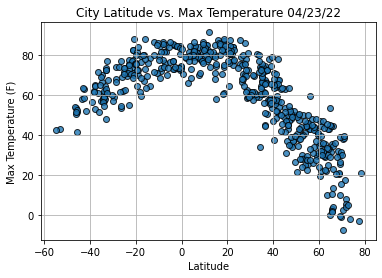

In [39]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

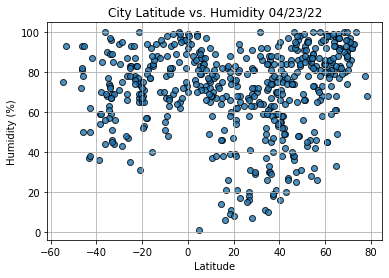

In [41]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

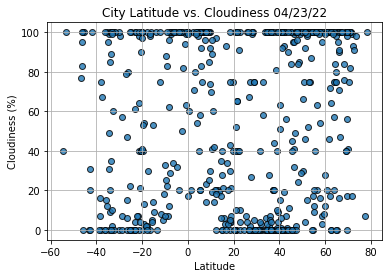

In [42]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

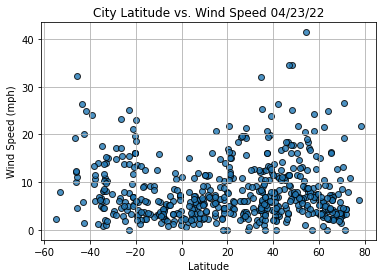

In [43]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()

In [46]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [47]:
# using loc method to find a specific row from an existing DF.
index13 = city_data_df.loc[13]
index13

City                   Chokurdakh
Country                        RU
Date          2022-04-24 01:20:08
Lat                       70.6333
Lng                      147.9167
Max Temp                     2.77
Humidty                        92
Cloudiness                     82
Wind Speed                   3.06
Name: 13, dtype: object

In [48]:
#filtering a DF 
city_data_df["Lat"] >= 0

0       True
1      False
2       True
3       True
4       True
       ...  
534     True
535     True
536     True
537     True
538     True
Name: Lat, Length: 539, dtype: bool

In [49]:
# return all rows in a DF based on specific criteria using loc method.
city_data_df.loc[(city_data_df['Lat'] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidty,Cloudiness,Wind Speed
0,Vieste,IT,2022-04-24 01:20:04,41.8825,16.1750,59.40,76,93,11.34
2,Faya,SA,2022-04-24 01:20:05,18.3851,42.4509,60.91,39,43,4.52
3,Sao Filipe,CV,2022-04-24 01:20:05,14.8961,-24.4956,74.37,75,0,5.84
4,Marawi,PH,2022-04-24 01:20:05,7.9986,124.2928,77.83,73,23,2.55
5,Baculin,PH,2022-04-24 01:20:05,7.4525,126.5842,84.15,71,96,6.24


In [50]:
northern_hemi_df = city_data_df.loc[(city_data_df['Lat'] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df['Lat'] < 0)]

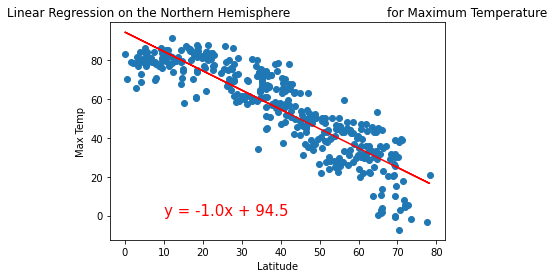

In [53]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,0))

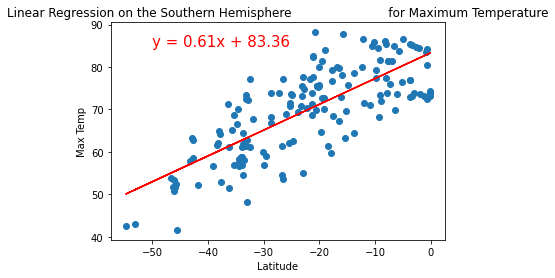

In [56]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,85))

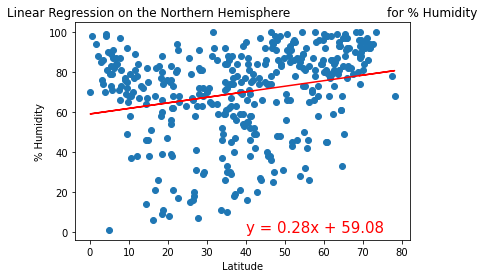

In [62]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidty"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,0))

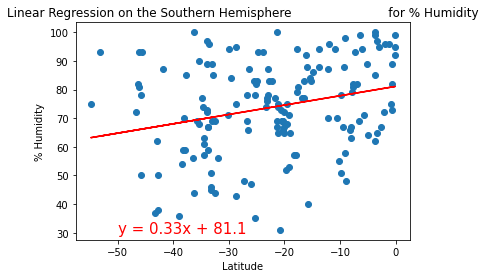

In [63]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidty"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,30))

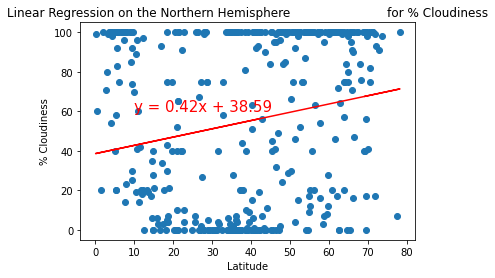

In [66]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(10,60))

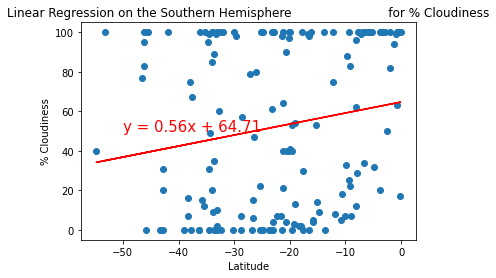

In [68]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,50))

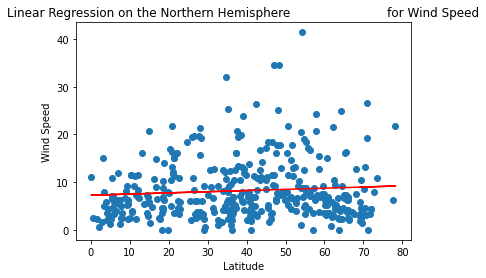

In [69]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(45,35))